## 3.1.1 텐서와 Autograd

- 텐서 : 파이토치에서 다양한 수식을 계산하는 데 사용하는 기본적인 자료구조
  - 차원(랭크)
  - 랭크 0 : 스칼라
  - 랭크 1 : 일렬로 숫자를 나열한 벡터
  - 랭크 2 : 2차원 행렬
  - 랭크 3 : 3차원 행렬

In [ ]:
import torch

In [ ]:
# 랭크 2 텐서(3x3)
x=torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### 차원의 크기 : size() 함수 또는 shape 키워드

In [ ]:
# 차원의 크기 : size()함수 또는 shape 키워드 /텐서의 랭크 : ndimension() 함수
print('Size',x.size())
print('Shape',x.shape)
print('랭크(차원)',x.ndimension())

Size torch.Size([3, 3])
Shape torch.Size([3, 3])
랭크(차원) 2


### 모양과 차원 조절 : unsqueeze(), squeeze(), view()

In [ ]:
# unsqueeze() : 텐서의 랭크 늘리기
x=torch.unsqueeze(x,0) # 랭크 2 텐서의 첫 번째(0번째)자리에 1이라는 차원값 추가
print(x)
print('Size',x.size())
print('Shape',x.shape)
print('랭크(차원)',x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size torch.Size([1, 3, 3])
Shape torch.Size([1, 3, 3])
랭크(차원) 3


In [ ]:
# squeeze(): 랭크 줄이기
x=torch.squeeze(x)
print(x)
print('Size',x.size())
print('Shape',x.shape)
print('랭크(차원)',x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size torch.Size([3, 3])
Shape torch.Size([3, 3])
랭크(차원) 2


In [ ]:
# view() : 텐서의 모양 바꾸기
# 랭크 2 [3,3] 모양 -> 랭크 1의 [9] 모양
x=x.view(9)
print(x)
print('Size',x.size())
print('Shape',x.shape)
print('랭크(차원)',x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size torch.Size([9])
Shape torch.Size([9])
랭크(차원) 1


In [ ]:
# unsqueeze, squeeze, view는 원소수는 못 바꿈, 모양과 차원 조절 

## 3.1.2 텐서를 이용한 연산과 행렬 곱

In [ ]:
# 행렬곱
"""
- 5x3 행렬 w와 3x2 행렬 x의 곱
w : torch의 randn함수()를 이용해 정규분포에서 무작위로 값을 뽑아 텐서 생성
randn(행,열,dtype=torch.float) 이때 dtype은 무작위로 수를 뽑을 때 실수를 뽑게끔 설정

"""
w=torch.randn(5,3,dtype=torch.float) # torch.randn(): 정규분포에서 무작위로 실수값을 뽑음
x=torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]]) # 3x2
print("w size:",w.size())
print("x size:",x.size())
print('w:',w)
print('x:',x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 1.9270,  0.4076, -0.3557],
        [-0.6439, -0.7086, -0.5795],
        [-0.8714,  1.4154, -0.3084],
        [ 0.3053,  0.2499,  1.7708],
        [-1.5743, -1.5407,  0.3097]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [ ]:
# 행렬곱 : torch.mm() 함수 이용
# wx
wx=torch.mm(w,x)
print('wx size:',wx.size())
print('wx:',wx)

wx size: torch.Size([5, 2])
wx: tensor([[ 1.3711,  3.3499],
        [-5.6671, -7.5991],
        [ 1.8328,  2.0684],
        [ 9.9093, 12.2353],
        [-4.6476, -7.4528]])


In [ ]:
# 행렬 연산 : 행렬의 덧셈
b=torch.randn(5,2,dtype=torch.float)
print('b size:',b.size())
print('b:',b)

b size: torch.Size([5, 2])
b:  tensor([[-0.0236, -1.6376],
        [-0.4688,  0.4115],
        [ 1.0037, -1.1549],
        [ 1.4543, -0.1557],
        [ 0.8565, -0.4391]])


In [ ]:
result=wx+b
print('result size:',result.size())
print('result:',result)

result size: torch.Size([5, 2])
result: tensor([[ 1.3475,  1.7124],
        [-6.1360, -7.1876],
        [ 2.8365,  0.9135],
        [11.3636, 12.0796],
        [-3.7911, -7.8919]])


## 3.1.3 Autograd

- Autograd : 파이토치에서 제공하는 자동미분엔진
- 경사하강법 : 오차를 수학적으로 표현한 loss function에서 기울기가 최소인 지점을 찾아내는 것, 즉 오차가 최소가 되는 지점을 찾아내는 것
  - w'=w-lr*w_grad
    - lr : 학습률(학습속도)
    - w_grad(기울기)가 양수일 경우, 함수 값이 커지는 중이라는 뜻이므로 w(가중치)값을 음의 방향으로 이동 
    - w_grad가 음수일 경우, 함수값이 작아지는 중이라는 뜻이므로 w를 양의 방향으로 이동
  
  
  - 머신러닝 모델이 주어진 데이터에 대해 정답과 가깝에 예측하려면 오차가 작아야 함
  - 파이토치의 Autograd를 이용해 미분 계산 자동화

In [ ]:
# 실습
# 랭크 0인 스칼라 텐서 w정의
# requires_grad=True : w에 대한 미분값을 w.grade에 저장 
w=torch.tensor(1.0,requires_grad=True)

In [ ]:
a=w*3
l=a**2

- 수식으로 표현하면 l=a^2=(3w)^2=9w^2
  - 연쇄법칙을 이용해 미분하면
  dl/dw=dl/da * da/dw

In [ ]:
# backward() : 연쇄법칙을 이용해 a와 w을 차례대로 미분
l.backward()
print('l을 w로 미분한 값은{}'.format(w.grad)) #w.grad에 w에 대해 미분한 값 저장

l을 w로 미분한 값은18.0


# 3.2 경사하강법으로 이미지 복원하기

## 3.2.1 오염된 이미지 문제

- weird_function() : 이미지 처리를 위한 함수
- 오염된 100x100 픽셀 이미지와 weird_function()을 이용해 원본 이미지 복원

## 3.2.2 오염된 이미지를 복원하는 방법

- 구조: 
input -> (weird_function) -> 오염된 이미지 (가설)
- 1) 오염된 이미지(broken_image)와 같은 크기의 랜덤 텐서(random_image)생성
- 2) 랜덤 텐서를 weird_function에 넣어 오염된 이미지(가설) 생성
- 3) if 가설 == 오염된 이미지(broken_image) : 원본 이미지 = 랜덤텐서
- 4) 따라서 가설과 오염된 이미지간의 차이가 최솟값이 되는 랜덤 텐서 찾기

In [ ]:
import torch 
import pickle # 이미지 파일 로드, pickle : 파이썬 객체를 파일 형태로 저장할때 씀
import matplotlib.pyplot as plt # matplotlib 라이브러리의 pyplot 모듈은 plot을 생성해줌

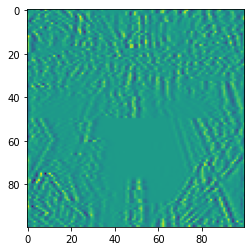

In [ ]:
# 원본이미지 크기 : [100,100]
# 텐서로 읽은 이미지 = 랭크 1의 벡터로 반환됨 [10,000]
broken_image=torch.FloatTensor(pickle.load(open('/content/drive/MyDrive/3-min-pytorch/03-파이토치로_구현하는_ANN/broken_image_t.p','rb'),encoding='latin1'))
#[10,000] -> [100,100] 모양을 바꾼뒤 matplotlib으로 시각화
plt.imshow(broken_image.view(100,100))

In [ ]:
# 이미지를 오염시키는 weird function
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [ ]:
# 오차 : 가설 이미지와 오염된 이미지 사이 거리
def distance_loss(hypothesis,broken_image):
  return torch.dist(hypothesis, broken_image)
# torch.dist : 두 텐서 사이의 거리를 구하는 함수 

In [ ]:
# 랜덤 텐서(random_tensor) 생성
random_tensor=torch.randn(10000,dtype=torch.float)

In [ ]:
# 학습률 : 한 반복에서 최소점으로 얼마나 이동하는지 설정, 학습률이 너무 크면 최소값을 못 찾고 지나칠 수 있음
lr=0.8

In [ ]:
# 경사하강법 구현
for i in range(0,20000):
  random_tensor.requires_grad_(True) # random tensor.grad에 random tensor에 대한 기울기 저장
  hypothesis=weird_function(random_tensor) # 가설
  loss=distance_loss(hypothesis,broken_image) #손실함수
  loss.backward() # 연쇄법칙을 이용해 기울기 random_tensor.grad에 기울기 저장
  with torch.no_grad(): # 경사하강법을 직접 구현하기 때문에 autograd x
    random_tensor=random_tensor-lr*random_tensor.grad # 기울기 방향의 반대쪽으로 이동
  if i%1000 == 0:
    print('Loss at {}={}'.format(i,loss.item())) # 1000번 반복될 때마다 오차 출력



Loss at 0=12.349535942077637
Loss at 1000=1.1416120529174805
Loss at 2000=0.5441804528236389
Loss at 3000=0.38080093264579773
Loss at 4000=0.3023515045642853
Loss at 5000=0.2541573941707611
Loss at 6000=0.21954289078712463
Loss at 7000=0.19196580350399017
Loss at 8000=0.16849665343761444
Loss at 9000=0.1476537436246872
Loss at 10000=0.12860161066055298
Loss at 11000=0.11082717776298523
Loss at 12000=0.09399546682834625
Loss at 13000=0.07787822932004929
Loss at 14000=0.06231587752699852
Loss at 15000=0.04719602316617966
Loss at 16000=0.032440684735774994
Loss at 17000=0.02113707736134529
Loss at 18000=0.021164968609809875
Loss at 19000=0.021167205646634102


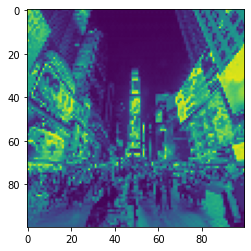

In [ ]:
# 원본 이미지 출력
plt.imshow(random_tensor.view(100,100).data)

# 3.3 신경망 모델 구현하기

## 3.3.1 인공 신경망(ANN)



- ANN(artificial neural network) 
- 크게 입력층 / 은닉층 / 출력층
  - 각 층은 노드로 구성되어 있다

- 인접한 층으로 출력값을 전달하기 전, 각 층은 입력값에 대한 처리를 함
  - Y=WX+B (행렬곱을 하고 편향을 더함)
  - 가중치 : 입력이 출력에 주는 영향
  - 편향 : 각 노드가 얼마나 데이터에 민감한지
  - 행렬곱의 결과는 활성화 함수를 거쳐서 출력 신호로 변환한 다음 인접 층으로 전달
  

- 오차 : 출력층이 낸 결과값과 정답의 차이
  - 역전파 알고리즘 : 경사하강법을 이용해 가중치 업데이트


## 3.3.2 간단한 분류 모델 구현하기

In [ ]:
# 1. 필요한 라이브러리 import
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
#2. train과 test 데이터 셋 생성
#make_blobs : 클러스터링 용 가상 데이터 생성
#인수 : n_samples (표본 크기),n_features(독립 변수의 수),centers (클러스터 개수나 중심 위치)
#반환값 : x([n_samples,n_features] 크기의 배열), y([n_samples]크기의 레이블 데이터)
n_dim=2
x_train,y_train=make_blobs(n_samples=80,n_features=n_dim,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True,cluster_std=0.3)
x_test,y_test=make_blobs(n_samples=20,n_features=n_dim,centers=[[1,1],[-1,-1],[1,-1],[-1,1]])


In [ ]:
#4개의 레이블-> 2개의 레이블로 축소
# 0,1 -> 0 / 2,3 ->1
def label_map(y_,from_,to_): # y_(레이블 데이터), from_ -> to_로 축소
  y=numpy.copy(y_) # y : y_와 독립인 배열
  for f in from_: # 
    y[y_ == f]=to_ 
  return y

y_train=label_map(y_train,[0,1],0)
y_train=label_map(y_train,[2,3],1)
y_test=label_map(y_test,[0,1],0)
y_test=label_map(y_test,[2,3],1)

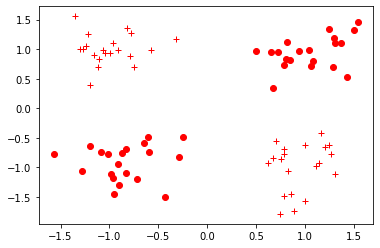

In [ ]:
#3. 학습데이터 시각화

def vis_data(x,y=None,c='r'):
  if y is None: # y에 데이터가 없으면
    y=[None]*len(x)
  for x_,y_ in zip(x,y):
    if y_ is None: 
      plt.plot(x_[0],x_[1],'*',markerfacecolor='none',markeredgecolor=c)
    else:
      plt.plot(x_[0],x_[1],c+'o' if y_==0 else c+'+')


plt.figure()
vis_data(x_train,y_train,c='r') # r(red)
plt.show()


In [ ]:
#4. 넘파이 벡터 데이터 -> 파이토치 센서
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)
x_test=torch.FloatTensor(x_test)
y_test=torch.FloatTensor(y_test)
print(x_train.shape)

torch.Size([80, 2])


In [ ]:
#5. 신경망 클래스 정의 (torch.nn.Module를 상속받는 클래스)
class NeuralNet(torch.nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNet,self).__init__() # NeuralNet의 객체는 nn.Module의 속성들로 초기화됨
    self.input_size=input_size
    self.hidden_size=hidden_size
    self.linear_1=torch.nn.Linear(self.input_size,self.hidden_size)# torch.nn.Linear : 행렬곱과 편향을 포함하는 연산
    self.relu=torch.nn.ReLU()
    self.linear_2=torch.nn.Linear(self.hidden_size,1)
    self.sigmoid=torch.nn.Sigmoid()

    # self.linear_1, self.linear_2 : 행렬곱과 편향을 더하는 함수 
    # torch.nn.Linear를 이용해 self.input_size * self.hidden_size 크기의 가중치행렬을 곱
    # self.relu, sefl.sigmoid : 활성화 함수

  def forward(self,input_tensor):
    linear1=self.linear_1(input_tensor) # [1,hidden_size] 크기의 output 반환
    relu=self.relu(linear1)
    linear2=self.linear_2(relu) # [1,1] 크기의 output 반환
    output=self.sigmoid(linear2) # 시그모이드 : 결과값이 0 ,1 중에 어디에 더 가까운지 알 수 있음
    return output

In [ ]:
# 6. 신경망 객체 정의
model=NeuralNet(2,5)
learning_rate=0.03
criterion=torch.nn.BCELoss() # 오차함수 : 이진 교차 엔트로피

epochs=2000 # 모델이 데이터를 총 몇 번 학습할 것인지
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate) # 최적화 : 확률적 경사하강법
# 확률적 경사하강법 : 샘플데이터셋을 추출해서 그 샘플데이터셋에 대해서만 기울기를 구하는 방식
# 장점 : 매 반복에서 다뤄야할 데이터 개수가 적어 학습속도가 빠름, 메모리 소모량이 매우낮음

In [ ]:
#7. 모델 성능평가
# 모델 학습전, 순전파를 진행하고 오차구하기
model.eval()
test_loss_before = criterion(model.forward(x_test).squeeze(), y_test) # squeeze :차원 줄이기
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7130604982376099


In [ ]:
#8. 신경망 학습 

for epoch in range(epochs):
  model.train() 
  optimizer.zero_grad() # 새 epoch에서 경사값 초기화
  train_output=model(x_train)
  train_loss=criterion(train_output.squeeze(),y_train) # 훈련후 오차값
  if epoch%100==0:
    print('Train loss at {} is {}'.format(epoch,train_loss.item()))
  #역전파 : 오차가 최소가 되는 방향으로 가중치값 업데이트
  train_loss.backward() # 오차함수를 가중치에 대해 미분
  optimizer.step() #w'=w-lr*w.grad


Train loss at 0 is 0.7185074090957642
Train loss at 100 is 0.6439365744590759
Train loss at 200 is 0.5889813303947449
Train loss at 300 is 0.5175734758377075
Train loss at 400 is 0.4404642581939697
Train loss at 500 is 0.3726010024547577
Train loss at 600 is 0.31873443722724915
Train loss at 700 is 0.2762988805770874
Train loss at 800 is 0.24259328842163086
Train loss at 900 is 0.21565096080303192
Train loss at 1000 is 0.1938360631465912
Train loss at 1100 is 0.17601414024829865
Train loss at 1200 is 0.16139887273311615
Train loss at 1300 is 0.149358868598938
Train loss at 1400 is 0.13939736783504486
Train loss at 1500 is 0.1310255080461502
Train loss at 1600 is 0.12389322370290756
Train loss at 1700 is 0.11776317656040192
Train loss at 1800 is 0.11244766414165497
Train loss at 1900 is 0.1078411117196083


In [ ]:
#9. 신경망 평가
model.eval()
test_loss=criterion(torch.squeeze(model(x_test)),y_test) #test 데이터셋에 대한 오차
print('After Training, test loss is {}'.format(test_loss.item()))


After Training, test loss is 1.0747358798980713


In [ ]:
#10. 모델 학습 결과 저장 
# state_dict() : 연산이름 : 가중치텐서와 편향 텐서 형태로 저장
torch.save(model.state_dict(),'./model.pt')
print('state dict format of the model:{}'.format(model.state_dict()))

state dict format of the model:OrderedDict([('linear_1.weight', tensor([[-1.7697, -1.6988],
        [ 1.9352,  1.9368],
        [ 0.5628, -0.7675],
        [ 0.0099,  0.3574],
        [ 0.2964,  0.1945]])), ('linear_1.bias', tensor([-0.2341, -0.5978,  0.4487,  1.3629, -0.5691])), ('linear_2.weight', tensor([[-2.4220, -2.7357,  0.9052,  1.2516,  0.1849]])), ('linear_2.bias', tensor([1.6005]))])


In [ ]:
#11. pretrained model적용
new_model=NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))


<All keys matched successfully>

In [ ]:
new_model.eval()
print('벡터 [-1,1]이 레이블 1을 가질 확률은{}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1,1]이 레이블 1을 가질 확률은0.9768193364143372
